
## Table of Contents

1. [Loading Data](#loading-data)
2. [Feature Engineering using Random Forest](#feature-engineering-using-random-forest)
    - [Selecting feature set](#selecting-feature-set)
3. [Feature Engineering using Logistic Regression](#feature-engineering-using-logistic-regression)
    - [Logistic Regression using Reduced Feature Set](#logistic-regression-using-reduced-feature-set)
    - [Random Forest using Reduced Feature Set](#random-forest-using-reduced-feature-set)
    - [XGBoost using Reduced Feature Set](#xgboost-using-reduced-feature-set)
4. [Final Model Building](#final-model-building)
    - [Logistic Regression with All Features](#logistic-regression-with-all-features)
    - [Random Forest Classifier with All Features](#random-forest-classifier-with-all-features)
    - [XG Boost with All Features](#xg-boost-with-all-features)
5. [Evaluation & Profit Computation](#evaluation--profit-computation)
    - [ROC Curve Comparison](#roc-curve-comparison)
    - [Profitability Threshold Computation](#profitability-threshold-computation)
    - [Classification Report for Profit Threshold](#classification-report-for-profit-threshold)
    - [Profit Per Call Calculation](#profit-per-call-calculation)


## Loading Data

In [ ]:
train_df = pd.read_csv("/train_data.csv")
test_df = pd.read_csv("/test_data.csv")

X_train = train_df.drop(columns = ["response_binary"], axis =1)
y_train = train_df["response_binary"]

X_test = test_df.drop(columns = ["response_binary"], axis =1)
y_test = test_df["response_binary"]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   duration             36168 non-null  int64
 1   balance              36168 non-null  int64
 2   age                  36168 non-null  int64
 3   day                  36168 non-null  int64
 4   poutcome_success     36168 non-null  bool 
 5   pdays                36168 non-null  int64
 6   campaign             36168 non-null  int64
 7   housing_yes          36168 non-null  bool 
 8   previous             36168 non-null  int64
 9   contact_unknown      36168 non-null  bool 
 10  education_secondary  36168 non-null  bool 
 11  month_mar            36168 non-null  bool 
 12  marital_married      36168 non-null  bool 
 13  education_tertiary   36168 non-null  bool 
 14  job_technician       36168 non-null  bool 
 15  month_jun            36168 non-null  bool 
 16  month_oct            3

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 36168 entries, 0 to 36167
Series name: response_binary
Non-Null Count  Dtype
--------------  -----
36168 non-null  int64
dtypes: int64(1)
memory usage: 282.7 KB


## Feature Engineering using Random Forest

In [ ]:
df_without_groups = df.drop(columns=["age_group", "pdays_group"])

<ipython-input-18-abc124a9cb68>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_without_groups["Importance"], y=feature_importances_without_groups["Feature"], palette="viridis")


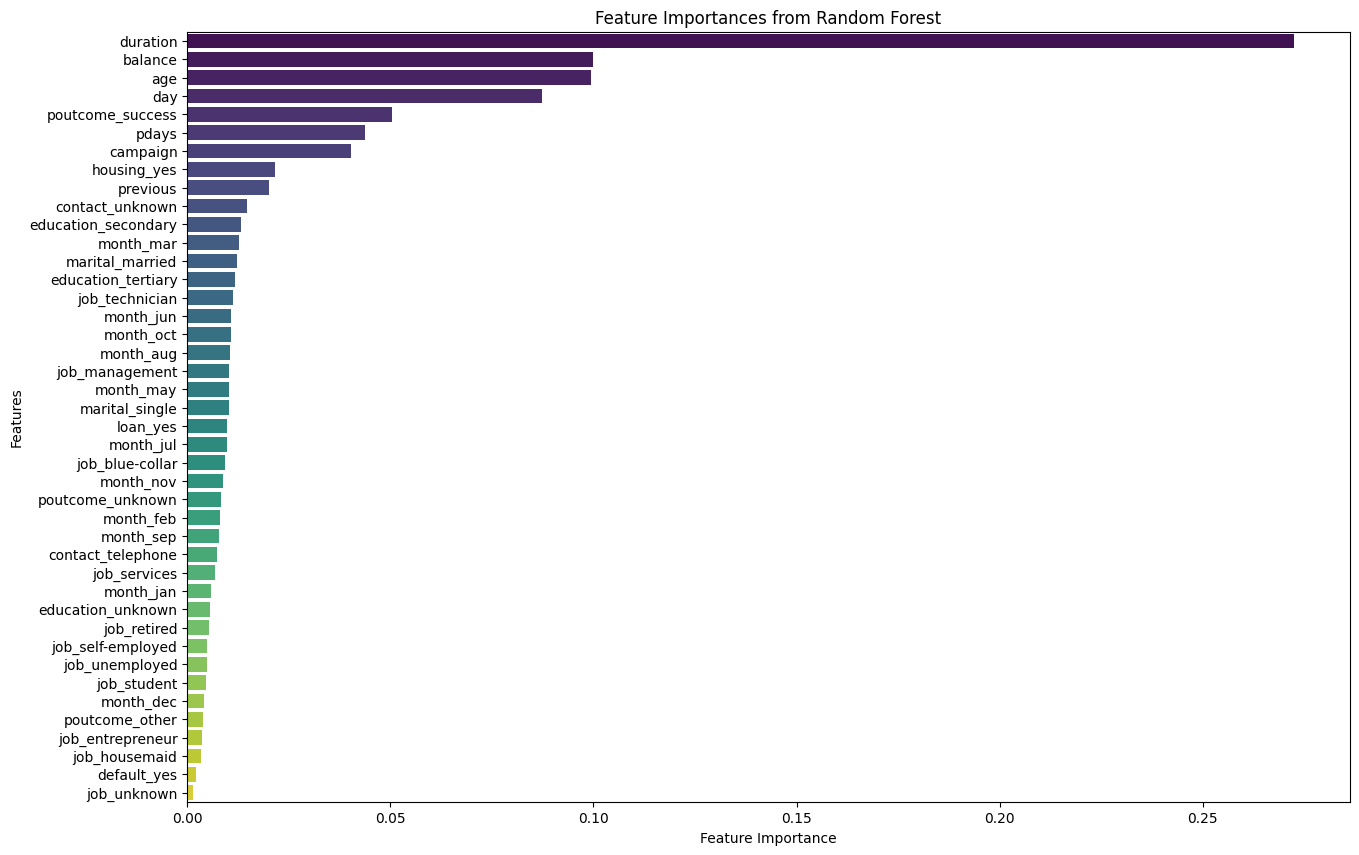

,Feature,Importance
3,duration,0.272568
1,balance,0.099819
0,age,0.099501
2,day,0.087452
40,poutcome_success,0.050291
5,pdays,0.043718
4,campaign,0.040189
24,housing_yes,0.021606
6,previous,0.020141
27,contact_unknown,0.014697


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Convert categorical variables into dummy variables (one-hot encoding)
df_encoded_without_groups = pd.get_dummies(df_without_groups, drop_first=True)

# Define features (X) and target variable (y)
X = df_encoded_without_groups.drop(columns=["response_binary"])  # Features (drop target column)
y_without_group = df_encoded_without_groups["response_binary"]  # Target variable

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_without_group, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 4: Get feature importances
feature_importances_without_groups = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Step 5: Plot feature importances
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_importances_without_groups["Importance"], y=feature_importances_without_groups["Feature"], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest")
plt.show()

# Display the feature importance values
display(feature_importances_without_groups)

### Selecting feature set

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Sort features by their importance
feature_importance_df = feature_importance.sort_values(by="Importance", ascending=False)
sorted_features = feature_importance_df["Features"].tolist()

# Define feature subsets to test
feature_set = {
    "Top 5":  sorted_features[:5],
    "Top 10": sorted_features[:10],
    "Top 20": sorted_features[:20],
    "All":    sorted_features
}

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)
result = {}

# Evaluate model using each feature subset
for subset_name, subset_cols in feature_set.items():
    X_subset = df_encoded[subset_cols]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y, random_state=42, test_size=0.2
    )

    # Train and evaluate model
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    result[subset_name] = auc

# Display ROC AUC scores for each feature subset
for subset_name, score in result.items():
    print(f"{subset_name}: ROC AUC = {score:.4f}")





/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Top 5: ROC AUC = 0.8482
Top 10: ROC AUC = 0.8641
Top 20: ROC AUC = 0.8870
All: ROC AUC = 0.9076


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X = df_encoded_without_groups[sorted_features_without_group]
y = df_encoded_without_groups["response_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
    }

    # Store results for each model
results = {}

for model_name, model in models.items():
        # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

        # Predict probabilities for ROC AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Compute accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

        # Store results
    results = {
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Training Time (s)": training_time,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
    }

    print(f"✅ {model_name} Results:")
    print(f"   ROC AUC: {roc_auc:.4f}")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Training Time: {training_time:.2f} sec\n")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Logistic Regression Results:
   ROC AUC: 0.9003
   Accuracy: 0.8979
   Training Time: 6.06 sec

✅ Random Forest Results:
   ROC AUC: 0.9254
   Accuracy: 0.9040
   Training Time: 6.57 sec



## Feature Engineering using Logistic Regression

In [ ]:
#Scaling features with Robust Scaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns =X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns =X_test.columns)

In [ ]:
#Checks for multicollinearity with VIF

from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = add_constant(X_train_scaled)
vif = pd.DataFrame()
vif["feature"] = X_train_scaled.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i+1) for i in range(len(X_train_scaled.columns))]
vif.sort_values(by = "VIF", ascending = False)

,feature,VIF
25,poutcome_unknown,6.188362
19,month_may,4.770720
5,pdays,4.650237
15,month_jun,3.554168
13,education_tertiary,3.394282
17,month_aug,3.108649
22,month_jul,3.097240
18,job_management,3.036106
20,marital_single,2.896004
10,education_secondary,2.603049


In [ ]:
X_vif.head()

,const,duration,balance,age,day,poutcome_success,pdays,campaign,housing_yes,previous,...,job_retired,job_self-employed,job_unemployed,job_student,month_dec,poutcome_other,job_entrepreneur,job_housemaid,default_yes,job_unknown
0,1.0,-0.502326,0.295806,0.133333,-0.076923,0.0,0.0,-0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.413953,0.712288,0.666667,1.076923,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-0.232558,2.498160,0.200000,1.153846,0.0,0.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.906977,-0.416483,-0.133333,-0.384615,0.0,0.0,4.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.390698,2.245033,1.133333,-0.076923,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_scaled = X_train_scaled.drop(columns = ["poutcome_unknown", "duration"], axis =1)
X_test_scaled = X_test_scaled.drop(columns = ["poutcome_unknown", "duration"], axis =1)

In [ ]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_scaled)
log_reg = sm.Logit(y_train, X_train_sm)
result = log_reg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.298592
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        response_binary   No. Observations:                36168
Model:                          Logit   Df Residuals:                    36127
Method:                           MLE   Df Model:                           40
Date:                Wed, 16 Apr 2025   Pseudo R-squ.:                  0.1683
Time:                        21:01:46   Log-Likelihood:                -10799.
converged:                       True   LL-Null:                       -12985.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.8116      0.080    -22.643      0.000      -1.968      -1.655
ba

In [ ]:
X_train_log = sm.add_constant(X_train).astype(float)
log_model_unscaled = sm.Logit(y_train, X_train_log)
result_unscaled = log_model_unscaled.fit()
print(result_unscaled.summary())

Optimization terminated successfully.
         Current function value: 0.237472
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        response_binary   No. Observations:                36168
Model:                          Logit   Df Residuals:                    36125
Method:                           MLE   Df Model:                           42
Date:                Wed, 16 Apr 2025   Pseudo R-squ.:                  0.3386
Time:                        21:02:44   Log-Likelihood:                -8588.9
converged:                       True   LL-Null:                       -12985.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.5585      0.205    -12.453      0.000      -2.961      -2.156
du

In [ ]:
X_train_log = X_train_log.drop(columns = ["poutcome_unknown", "duration"], axis =1)
X_test_log = X_test_log.drop(columns = ["poutcome_unknown", "duration"], axis =1)

In [ ]:

# Get coefficient values from the fitted model
coefficients = result.params
std_err = result.bse

# Get confidence intervals
conf = result.conf_int()
conf.columns = ['Lower CI', 'Upper CI']

# Calculate odds ratios
odds_ratios = np.exp(coefficients)
conf['Odds Ratio Lower'] = np.exp(conf['Lower CI'])
conf['Odds Ratio Upper'] = np.exp(conf['Upper CI'])

# Combine all into a summary table
summary_table = pd.concat([coefficients,std_err, odds_ratios, conf], axis=1)
summary_table.columns = ['Coefficient', "Standard Error", 'Odds Ratio', 'Lower CI', 'Upper CI', 'OR Lower', 'OR Upper']

# Sort by absolute coefficient magnitude or odds ratio if needed
summary_table = summary_table.sort_values(by='Odds Ratio', key=np.abs, ascending=False)

summary_table.head(40)  # Top 15 for inspection


,Coefficient,Standard Error,Odds Ratio,Lower CI,Upper CI,OR Lower,OR Upper
poutcome_success,2.173273,0.072387,8.786993,2.031396,2.315149,7.624727,10.126428
month_mar,1.041983,0.124855,2.834832,0.797271,1.286694,2.219476,3.620797
month_sep,0.645069,0.120783,1.906119,0.408340,0.881799,1.504319,2.415241
month_oct,0.596904,0.108439,1.816487,0.384368,0.809441,1.468686,2.246651
month_dec,0.572425,0.174921,1.772560,0.229587,0.915263,1.258081,2.497432
job_retired,0.335965,0.097375,1.399290,0.145113,0.526816,1.156171,1.693532
education_tertiary,0.306314,0.074399,1.358409,0.160494,0.452134,1.174091,1.571662
job_student,0.303132,0.112314,1.354094,0.083000,0.523264,1.086542,1.687527
poutcome_other,0.269947,0.084041,1.309894,0.105230,0.434663,1.110966,1.544443
job_unemployed,0.165617,0.109284,1.180121,-0.048575,0.379810,0.952586,1.462007


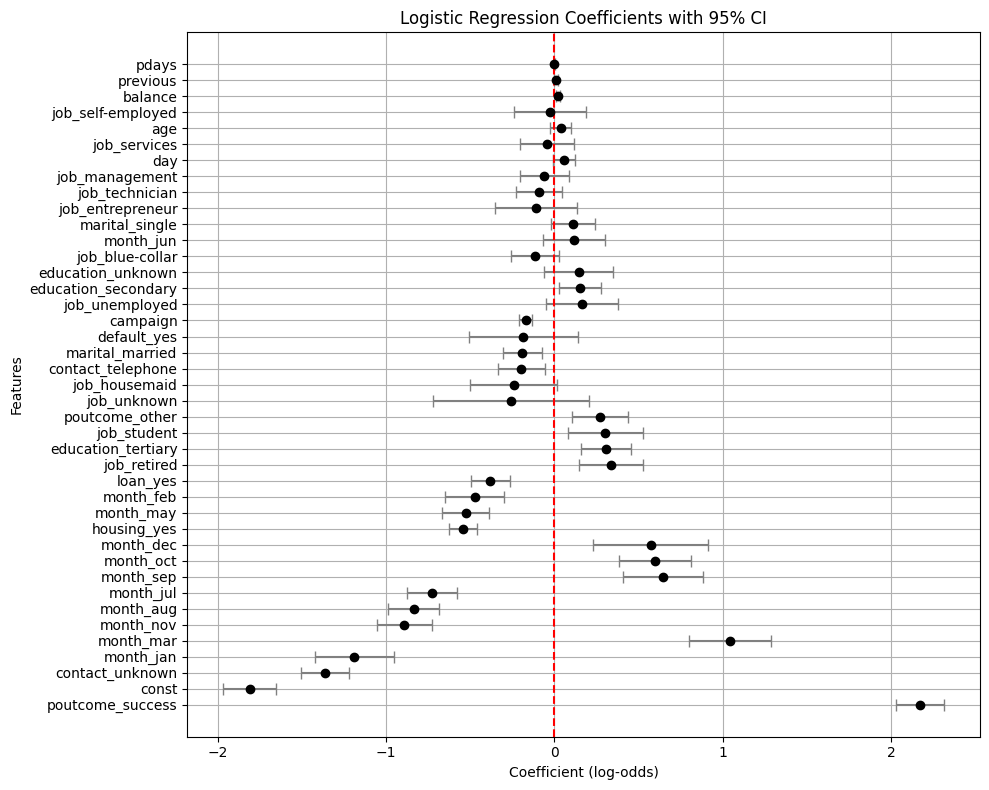

In [ ]:
#Plot coefficients with error bars

plt.figure(figsize=(10, 8))
plt.errorbar(summary_table["Coefficient"], summary_table.index,
             xerr = 1.96 * summary_table["Standard Error"],
             fmt = 'o', color = 'black', ecolor = 'gray', capsize=4)
plt.axvline(x=0, color = "red", linestyle = '--')
plt.xlabel("Coefficient (log-odds)")
plt.ylabel("Features")
plt.title("Logistic Regression Coefficients with 95% CI")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
drop_features = summary_table[(summary_table["Lower CI"]<=0) & (summary_table['Upper CI']>=0)].index.tolist()
X_train_reduced = X_train.drop(columns = drop_features, axis =1)
X_test_reduced = X_test.drop(columns = drop_features, axis =1)

drop_features

['job_unknown',
 'job_housemaid',
 'default_yes',
 'job_unemployed',
 'education_unknown',
 'job_blue-collar',
 'month_jun',
 'marital_single',
 'job_entrepreneur',
 'job_technician',
 'job_management',
 'day',
 'job_services',
 'age',
 'job_self-employed',
 'previous',
 'pdays']

###Logistic Regression using Reduced Feature Set

In [ ]:
#LOGISTIC REGRESSION

# Define parameter grid
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear']
}

# Initialize model
log_reg = LogisticRegression(max_iter=1000)

# Perform Grid Search
grid_log = GridSearchCV(log_reg, log_reg_params, scoring='roc_auc', cv=5, n_jobs=-1)
grid_log.fit(X_train_reduced, y_train)

y_pred_log_reg = grid_log.predict(X_test_reduced)
y_pred_proba_log_reg = grid_log.predict_proba(X_test_reduced)[:,1]
roc_auc = roc_auc_score(y_test,y_pred_proba_log_reg)

# Print best parameters
print("Best Logistic Regression Parameters:", grid_log.best_params_)
print(f"roc_auc: {roc_auc}")
# Use best model for predictions
best_log_reg = grid_log.best_estimator_


Best Logistic Regression Parameters: {'C': 0.1, 'solver': 'lbfgs'}
roc_auc: 0.9036114026044444


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest using Reduced Feature Set

In [ ]:
#RANDOM FOREST


# Define parameter grid
rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search (faster than Grid Search)
random_rf = RandomizedSearchCV(rf, rf_params, n_iter=20, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)
random_rf.fit(X_train_reduced, y_train)

y_pred_rf = random_rf.predict(X_test_reduced)
y_pred_proba_rf = random_rf.predict_proba(X_test_reduced)[:,1]
roc_auc = roc_auc_score(y_test,y_pred_proba_rf)

# Print best parameters
print("Best Random Forest Parameters:", random_rf.best_params_)
print(f"roc_auc: {roc_auc}")

# Use best model for predictions
best_rf = random_rf.best_estimator_


Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30}
roc_auc: 0.9196229162325004


###XGBoost using Reduced Feature Set

In [ ]:
#XG BOOST

# Define parameter grid
xgb_params = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 2, 5, 10]
}

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform Randomized Search
random_xgb = RandomizedSearchCV(xgb, xgb_params, n_iter=20, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)
random_xgb.fit(X_train_reduced, y_train)

y_pred_xgb = random_xgb.predict(X_test_reduced)
y_pred_proba_xgb = random_xgb.predict_proba(X_test_reduced)[:,1]

best_threshold = 0.2
y_pred_xgb_adjusted = (y_pred_proba_xgb >= best_threshold).astype(int)

roc_auc = roc_auc_score(y_test,y_pred_proba_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb_adjusted)
recall = recall_score(y_test, y_pred_xgb_adjusted)
precision = precision_score(y_test, y_pred_xgb_adjusted)
f1 = f1_score(y_test, y_pred_xgb_adjusted)

# Print best parameters
print("Best XGBoost Parameters:", random_xgb.best_params_)
print(f"roc_auc: {roc_auc}")
print(f"Accuracy of XGB: {accuracy:.4f}")
print(f"Precision of XGB: {precision:.4f}")
print(f"Recall of XGB: {recall:.4f}")
print(f"F1-score of XGB: {f1:.4f}")
# Use best model for predictions
best_xgb = random_xgb.best_estimator_



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:36:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Parameters: {'subsample': 0.9, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
roc_auc: 0.9214394985863855
Accuracy of XGB: 0.8718
Precision of XGB: 0.4813
Recall of XGB: 0.8011
F1-score of XGB: 0.6013


## Final Model Building

### Logistic Regression with All Features

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Define parameter grid
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear']
}

# Initialize model
log_reg = LogisticRegression(max_iter=1000)

# Perform Grid Search
grid_log = GridSearchCV(log_reg, log_reg_params, scoring='roc_auc', cv=5, n_jobs=-1)
grid_log.fit(X_train, y_train)

y_pred_log_reg = grid_log.predict(X_test)
y_pred_proba_log_reg = grid_log.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test,y_pred_proba_log_reg)

# Print best parameters
print("Best Logistic Regression Parameters:", grid_log.best_params_)
print(f"roc_auc: {roc_auc}")
# Use best model for predictions
best_log_reg = grid_log.best_estimator_


Best Logistic Regression Parameters: {'C': 100, 'solver': 'liblinear'}
roc_auc: 0.9029957702216967


### Random Forest Classifier with All Features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search (faster than Grid Search)
random_rf = RandomizedSearchCV(rf, rf_params, n_iter=20, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)
random_rf.fit(X_train, y_train)

y_pred_rf = random_rf.predict(X_test)
y_pred_proba_rf = random_rf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test,y_pred_proba_rf)

# Print best parameters
print("Best Random Forest Parameters:", random_rf.best_params_)
print(f"roc_auc: {roc_auc}")

# Use best model for predictions
best_rf = random_rf.best_estimator_


Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
roc_auc: 0.9292584102230247


### XG Boost with All Features

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score

# Define parameter grid
xgb_params = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 2, 5, 10]
}

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform Randomized Search
random_xgb = RandomizedSearchCV(xgb, xgb_params, n_iter=20, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)
random_xgb.fit(X_train, y_train)

y_pred_xgb = random_xgb.predict(X_test)
y_pred_proba_xgb = random_xgb.predict_proba(X_test)[:,1]

best_threshold = 0.2
y_pred_xgb_adjusted = (y_pred_proba_xgb >= best_threshold).astype(int)

roc_auc = roc_auc_score(y_test,y_pred_proba_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb_adjusted)
recall = recall_score(y_test, y_pred_xgb_adjusted)
precision = precision_score(y_test, y_pred_xgb_adjusted)
f1 = f1_score(y_test, y_pred_xgb_adjusted)

# Print best parameters
print("Best XGBoost Parameters:", random_xgb.best_params_)
print(f"roc_auc: {roc_auc}")
print(f"Accuracy of XGB: {accuracy:.4f}")
print(f"Precision of XGB: {precision:.4f}")
print(f"Recall of XGB: {recall:.4f}")
print(f"F1-score of XGB: {f1:.4f}")
# Use best model for predictions
best_xgb = random_xgb.best_estimator_


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:16:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Parameters: {'subsample': 0.9, 'reg_lambda': 5, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
roc_auc: 0.9349390338363821
Accuracy of XGB: 0.8831
Precision of XGB: 0.5096
Recall of XGB: 0.8231
F1-score of XGB: 0.6295


## Evaluation & Profit Computation

### ROC Curve Comparision

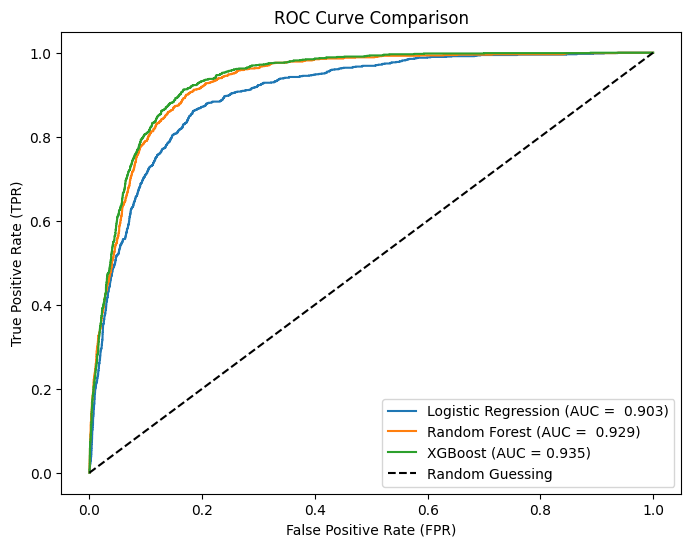

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log_reg)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log: .3f})")

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf: .3f})")

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label = f"XGBoost (AUC = {roc_auc_xgb :.3f})")

plt.plot([0,1], [0,1], "k--", label = "Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend(loc = "lower right")
plt.show()



### Profitability Threshold Computation

In [ ]:
# Load dataset (update path as needed)
df = pd.read_csv("/content/drive/MyDrive/Portugese bank marketing/bank-additional-full.csv", sep=';', quotechar='"')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
average_interest_rate = round(df["euribor3m"].mean(),3)
average_interest_rate

np.float64(3.621)

In [ ]:
def revenue_per_subscription(average_interest_rate, customer_interest_rate, average_deposit_size):
  return round(((average_interest_rate - customer_interest_rate)/100) * average_deposit_size, 2)


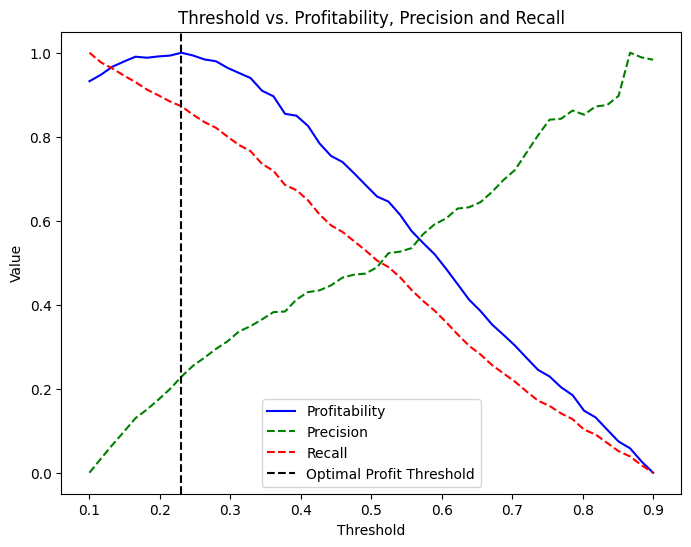

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# revenue_per_subscription:500, cost_per_call:10

def compute_profitability(y_true, y_pred_proba, revenue_per_subscription=500, cost_per_call=5):
    """
    Computes profitability for different classification thresholds.

    Parameters:
    - y_true: Actual class labels (0 or 1)
    - y_pred_proba: Predicted probabilities for class 1
    - revenue_per_subscription: Revenue per converted customer (default $500)
    - cost_per_call: Cost of calling a predicted positive (default $10)

    Returns:
    - thresholds: List of tested thresholds
    - profit_values: Corresponding profit values at each threshold
    """
    thresholds = np.linspace(0.1, 0.9, 50)  # Test multiple thresholds
    profit_values = []
    precision_values = []
    recall_values = []

    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)

        TP = np.sum((y_pred == 1) & (y_true == 1))  # True Positives
        FP = np.sum((y_pred == 1) & (y_true == 0))  # False Positives

        revenue = TP * revenue_per_subscription
        cost = (TP + FP) * cost_per_call
        profit = revenue - cost

        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)

        precision_values.append(precision)
        recall_values.append(recall)

        profit_values.append(profit)

    return thresholds, profit_values, precision_values, recall_values

#rev_per_sub = revenue_per_subscription(average_interest_rate, 3.3, 10000)
rev_per_sub = revenue_per_subscription(average_interest_rate, 2.5, 2000)

# Example Usage (Assuming y_test and y_pred_proba_xgb are available)
thresholds, profits , precisions, recalls = compute_profitability(y_test, y_pred_proba_xgb, rev_per_sub)

# Normalize values
profits_scaled = (profits - np.min(profits)) / (np.max(profits) - np.min(profits))
precisions_scaled = (precisions - np.min(precisions)) / (np.max(precisions) - np.min(precisions))
recalls_scaled = (recalls - np.min(recalls)) / (np.max(recalls) - np.min(recalls))


# Plot Threshold vs. Profitability Curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, profits_scaled, label="Profitability", color='blue')
plt.plot(thresholds, precisions_scaled, label = "Precision", color = "green", linestyle = '--')
plt.plot(thresholds, recalls_scaled, label = "Recall", color= "red", linestyle = "--")
plt.xlabel("Threshold")
plt.ylabel("Value")
plt.title("Threshold vs. Profitability, Precision and Recall")
plt.axvline(x=thresholds[np.argmax(profits_scaled)], color='black', linestyle="--", label="Optimal Profit Threshold")
plt.legend()
plt.show()


In [ ]:
rev_per_sub

np.float64(22.42)

In [ ]:
round(thresholds[np.argmax(profits_scaled)],2)

np.float64(0.23)

In [ ]:
max(profits)


np.float64(5589.120000000001)

### Classification Report for Profit Threshold

In [ ]:
from sklearn.metrics import classification_report

best_profit_threshold = 0.23
y_pred_xgb_adjusted = (y_pred_proba_xgb >= best_profit_threshold).astype(int)
report = classification_report(y_test, y_pred_xgb_adjusted, digits=2)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.90      0.94      7952
           1       0.53      0.80      0.64      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.85      0.79      9043
weighted avg       0.92      0.89      0.90      9043



### Profit Per Call Calculation

In [ ]:
revenue_per_subscription = 22.42  # Your estimated value
cost_per_call = 5

# Apply best threshold
y_pred = (y_pred_proba_xgb >= best_threshold).astype(int)

# Calculate TP and FP
TP = np.sum((y_pred == 1) & (y_test == 1))
FP = np.sum((y_pred == 1) & (y_test == 0))
total_calls = TP + FP

# Calculate profit
total_profit = (TP * revenue_per_subscription) - (total_calls * cost_per_call)

# Profit per call
profit_per_call = total_profit / total_calls if total_calls > 0 else 0

print(f"Total Profit: ${total_profit:.2f}")
print(f"Profit per Call: ${profit_per_call:.2f}")

Total Profit: $11323.16
Profit per Call: $6.43
